# COGS 108 - Data Checkpoint

# Names

- Yixuan Jiao
- Antonio (jose) Gomez
- Dat Ta
- Albert

<a id='research_question'></a>
# Research Question

Do Americans living in poor households (income below U.S. Federal Poverty threshold) get/contract Covid at a higher rate?

# Dataset(s)

- Dataset Name: AH Provisional COVID-19 Deaths by Hospital Referral Region
- Link to the dataset: https://data.cdc.gov/api/views/mqmc-4b9n/rows.csv?accessType=DOWNLOAD
- Number of observations:103734

- Dataset Name: NYT Covid 19 states data (us-states.csv)
- Link to the dataset: https://github.com/nytimes/covid-19-data/blob/master/us-states.csv
- Number of observations: 43910

- Dataset Name: 2020-2021 estimate population by counties
- Link to the dataset: https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/co-est2021-alldata.csv
- Number of observations: 3194

- Dataset Name: 2020 Small Area Income and Poverty Estimates (SAIPE)
- Link to the dataset: https://www.census.gov/data-tools/demo/saipe/#/?map_geoSelector=aa_c
- Number of observations: 3195



We will be using the poverty counts and percentage of each county and compare that with the number of covid cases across different counties throughout the country in order to determine if poverty affect covid cases. 

# Setup

In [1]:
import pandas as pd
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
#Loading HRR covid deaths data
covid_hrr =pd.read_csv('https://data.cdc.gov/api/views/mqmc-4b9n/rows.csv?accessType=DOWNLOAD')
covid_hrr.head(2)

,Data as of,Start Date,End Date,MMWR Year,MMWR Week,Week Ending Date,HRR Name,HRR Number,State,Total Deaths,...,Total Deaths over 65 years,COVID-19 Deaths over 65 years,Total Deaths 65 to 74 years,COVID-19 Deaths 65 to 74 years,Total Deaths 75 to 84 years,COVID-19 Deaths 75 to 84 years,Total Deaths over 85 years,COVID-19 Deaths over 85 years,Footnote,Accuracy_index
0,08/22/2021,01/04/2015,01/10/2015,2015,1,01/10/2015,AK- ANCHORAGE,10,AK,15.195338,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,One or more data cells have counts between 1-9...,0.924372
1,08/22/2021,01/11/2015,01/17/2015,2015,2,01/17/2015,AK- ANCHORAGE,10,AK,16.110306,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,One or more data cells have counts between 1-9...,0.910784


In [3]:
#showing the shape of dataset
covid_hrr.shape

(103734, 21)

In [4]:
#showing columns infromation to determine which part of the data we need
covid_hrr.columns

Index(['Data as of', 'Start Date', 'End Date', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'HRR Name', 'HRR Number', 'State', 'Total Deaths',
       'COVID-19 Deaths', 'Total Deaths over 65 years',
       'COVID-19 Deaths over 65 years', 'Total Deaths 65 to 74 years',
       'COVID-19 Deaths 65 to 74 years', 'Total Deaths 75 to 84 years',
       'COVID-19 Deaths 75 to 84 years', 'Total Deaths over 85 years',
       'COVID-19 Deaths over 85 years', 'Footnote', 'Accuracy_index'],
      dtype='object')

In [5]:
#selecting columns we are interested in
covid_hrr = covid_hrr.iloc[:,[1,2,3,6,8,9,10]]
covid_hrr.head()

,Start Date,End Date,MMWR Year,HRR Name,State,Total Deaths,COVID-19 Deaths
0,01/04/2015,01/10/2015,2015,AK- ANCHORAGE,AK,15.195338,0.0
1,01/11/2015,01/17/2015,2015,AK- ANCHORAGE,AK,16.110306,0.0
2,01/18/2015,01/24/2015,2015,AK- ANCHORAGE,AK,21.452870,0.0
3,01/25/2015,01/31/2015,2015,AK- ANCHORAGE,AK,19.602804,0.0
4,02/01/2015,02/07/2015,2015,AK- ANCHORAGE,AK,16.859181,0.0


In [6]:
#filtering date since covid-19 only outbreak in U.S. after 2020
covid_hrr = covid_hrr[covid_hrr['MMWR Year'] >= 2020]
#Drop rows with both Total Deaths and Covid-19 Deaths are NA since these rows can't give more information
covid_hrr = covid_hrr.dropna(axis = 0, how = 'all', subset = ['Total Deaths','COVID-19 Deaths'])
#replacing those NA to 0 since usually those NA comes from no available case reported
covid_hrr[['Total Deaths','COVID-19 Deaths']] = covid_hrr[['Total Deaths','COVID-19 Deaths']].fillna(0)
covid_hrr.isnull().values.any()

False

In [7]:
# Loading states covid data
# A county covid dataset are also available under the same resporitory, we could retrieve it as we need following the same procedure like retrieving this one.
covid_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
covid_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [8]:
covid_states.shape

(43966, 5)

In [9]:
#it is already very clean table
covid_states.isnull().values.any()

False

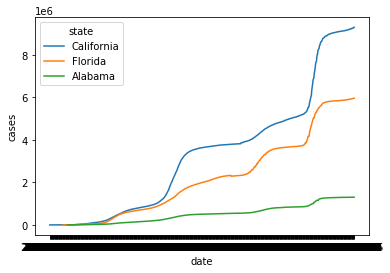

In [10]:
#plotting some states' cases over data further more validate the dataset since this trend make sense and that reminds us to get some population dataset to normalize the count.
covid_states_sub = covid_states[covid_states['state'].isin(['California','Florida','Alabama'])]
states_lineplot = sns.lineplot(x = covid_states_sub['date'], y = covid_states_sub['cases'], hue = covid_states_sub['state'])

In [11]:
#Loading population dataset
county_population = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/co-est2021-alldata.csv',encoding='latin-1')

In [12]:
county_population.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
0,40,3,6,1,0,Alabama,Alabama,5024279,5024803,5039877,...,242,114572,114572,114572,11.191613,12.890226,-1.698613,0.247201,4.398749,4.645950
1,50,3,6,1,1,Alabama,Autauga County,58805,58877,59095,...,8,442,442,442,11.002611,11.545112,-0.542502,0.084766,4.017903,4.102668
2,50,3,6,1,3,Alabama,Baldwin County,231767,233140,239294,...,-82,2177,2177,2177,9.567474,12.137145,-2.569671,0.266704,28.702422,28.969126
3,50,3,6,1,5,Alabama,Barbour County,25223,25180,24964,...,1,2789,2789,2789,10.928526,15.714742,-4.786216,0.039885,-3.908743,-3.868858
4,50,3,6,1,7,Alabama,Bibb County,22293,22223,22477,...,-1,2062,2062,2062,10.111857,12.617450,-2.505593,0.089485,13.825503,13.914989


In [13]:
county_population.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'ESTIMATESBASE2020', 'POPESTIMATE2020', 'POPESTIMATE2021',
       'NPOPCHG2020', 'NPOPCHG2021', 'BIRTHS2020', 'BIRTHS2021', 'DEATHS2020',
       'DEATHS2021', 'NATURALCHG2020', 'NATURALCHG2021',
       'INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'DOMESTICMIG2020',
       'DOMESTICMIG2021', 'NETMIG2020', 'NETMIG2021', 'RESIDUAL2020',
       'RESIDUAL2021', 'GQESTIMATESBASE2020', 'GQESTIMATES2020',
       'GQESTIMATES2021', 'RBIRTH2021', 'RDEATH2021', 'RNATURALCHG2021',
       'RINTERNATIONALMIG2021', 'RDOMESTICMIG2021', 'RNETMIG2021'],
      dtype='object')

In [14]:
county_population.shape

(3194, 35)

In [15]:
county_population = county_population.iloc[:,[5,6,8,9]]
county_population.columns = ['state','county','pop_estimate_2020','pop_estimate_2020']
county_population.head()

,state,county,pop_estimate_2020,pop_estimate_2020
0,Alabama,Alabama,5024803,5039877
1,Alabama,Autauga County,58877,59095
2,Alabama,Baldwin County,233140,239294
3,Alabama,Barbour County,25180,24964
4,Alabama,Bibb County,22223,22477


In [16]:
county_population.isnull().values.any()

False

In [17]:
#found some states' population stats in that we potentially need that
state_population = county_population[county_population['county'] == county_population['state']]
state_population.head()

,state,county,pop_estimate_2020,pop_estimate_2020
0,Alabama,Alabama,5024803,5039877
68,Alaska,Alaska,732441,732673
99,Arizona,Arizona,7177986,7276316
115,Arkansas,Arkansas,3012232,3025891
191,California,California,39499738,39237836


In [18]:
#delete those rows from our county population dataset since those rows are not showing counties' population
county_population = county_population[county_population['county'] != county_population['state']]

In [19]:
# loading in poverty dataset
poverty_df = pd.read_csv('./SAIPESNC_06MAY22_22_34_21_89.csv')
poverty_df.head()

,Year,State,County ID,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Count LB 90%,All Ages in Poverty Count UB 90%,90% Confidence Interval (All Ages in Poverty Count),All Ages in Poverty Percent,...,Under Age 5 in Poverty Count UB 90%,90% Confidence Interval (Under Age 5 in Poverty Count),Under Age 5 in Poverty Percent,Under Age 5 in Poverty Percent LB 90%,Under Age 5 in Poverty Percent UB 90%,90% Confidence Interval (Under Age 5 in Poverty Percent),Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%,90% Confidence Interval (Median Household Income in Dollars)
0,2020,0,0,United States,"321,478,113","38,371,394","38,309,115","38,433,673","38,309,115 to 38,433,673",11.9,...,"3,158,914","3,133,736 to 3,158,914",16.8,16.7,16.9,16.7 to 16.9,"$67,340","$67,251","$67,429","$67,251 to $67,429"
1,2020,1,1000,Alabama,"4,799,999","714,568","695,249","733,887","695,249 to 733,887",14.9,...,"70,797","61,541 to 70,797",23.3,21.7,24.9,21.7 to 24.9,"$53,958","$53,013","$54,903","$53,013 to $54,903"
2,2020,1,1001,Autauga County (AL),"55,622","6,242","4,930","7,554","4,930 to 7,554",11.2,...,NaN,NaN,NaN,NaN,NaN,NaN,"$67,565","$59,132","$75,998","$59,132 to $75,998"
3,2020,1,1003,Baldwin County (AL),"226,513","20,189","15,535","24,843","15,535 to 24,843",8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,"$71,135","$66,540","$75,730","$66,540 to $75,730"
4,2020,1,1005,Barbour County (AL),"21,745","5,548","4,210","6,886","4,210 to 6,886",25.5,...,NaN,NaN,NaN,NaN,NaN,NaN,"$38,866","$33,510","$44,222","$33,510 to $44,222"


In [20]:
poverty_df.shape, poverty_df.columns

((3195, 44),
 Index(['Year', 'State', 'County ID', 'State / County Name',
        'All Ages SAIPE Poverty Universe', 'All Ages in Poverty Count',
        'All Ages in Poverty Count LB 90%', 'All Ages in Poverty Count UB 90%',
        '90% Confidence Interval (All Ages in Poverty Count)',
        'All Ages in Poverty Percent', 'All Ages in Poverty Percent LB 90%',
        'All Ages in Poverty Percent UB 90%',
        '90% Confidence Interval (All Ages in Poverty Percent)',
        'Under Age 18 SAIPE Poverty Universe', 'Under Age 18 in Poverty Count',
        'Under Age 18 in Poverty Count LB 90%',
        'Under Age 18 in Poverty Count UB 90%',
        '90% Confidence Interval (Under Age 18 in Poverty Count)',
        'Under Age 18 in Poverty Percent',
        'Under Age 18 in Poverty Percent LB 90%',
        'Under Age 18 in Poverty Percent UB 90%',
        '90% Confidence Interval (Under Age 18 in Poverty Percent)',
        'Ages 5 to 17 in Families SAIPE Poverty Universe',
        '

In [21]:
# removing unecessary columns
poverty_df = poverty_df.drop(columns=['Year','All Ages SAIPE Poverty Universe',\
                 'All Ages in Poverty Count LB 90%', 'All Ages in Poverty Count UB 90%',\
                 '90% Confidence Interval (All Ages in Poverty Count)',
                 'All Ages in Poverty Percent LB 90%',
                 'All Ages in Poverty Percent UB 90%',
                 '90% Confidence Interval (All Ages in Poverty Percent)',
                 'Under Age 18 SAIPE Poverty Universe',
                 'Under Age 18 in Poverty Count LB 90%',
                 'Under Age 18 in Poverty Count UB 90%',
                 '90% Confidence Interval (Under Age 18 in Poverty Count)',
                 'Under Age 18 in Poverty Percent LB 90%',
                 'Under Age 18 in Poverty Percent UB 90%',
                 '90% Confidence Interval (Under Age 18 in Poverty Percent)',
                 'Ages 5 to 17 in Families SAIPE Poverty Universe',
                 'Ages 5 to 17 in Families in Poverty Count',
                 'Ages 5 to 17 in Families in Poverty Count LB 90%',
                 'Ages 5 to 17 in Families in Poverty Count UB 90%',
                 '90% Confidence Interval (Ages 5 to 17 in Families in Poverty Count)',
                 'Ages 5 to 17 in Families in Poverty Percent',
                 'Ages 5 to 17 in Families in Poverty Percent LB 90%',
                 'Ages 5 to 17 in Families in Poverty Percent UB 90%',
                 '90% Confidence Interval (Ages 5 to 17 in Families in Poverty Percent)',
                 'Under Age 5 SAIPE Poverty Universe', 'Under Age 5 in Poverty Count',
                 'Under Age 5 in Poverty Count LB 90%',
                 'Under Age 5 in Poverty Count UB 90%',
                 '90% Confidence Interval (Under Age 5 in Poverty Count)',
                 'Under Age 5 in Poverty Percent',
                 'Under Age 5 in Poverty Percent LB 90%',
                 'Under Age 5 in Poverty Percent UB 90%',
                 '90% Confidence Interval (Under Age 5 in Poverty Percent)',
                 'Median Household Income in Dollars LB 90%',
                 'Median Household Income in Dollars UB 90%',
                 '90% Confidence Interval (Median Household Income in Dollars)'])

poverty_df.head()

,State,County ID,State / County Name,All Ages in Poverty Count,All Ages in Poverty Percent,Under Age 18 in Poverty Count,Under Age 18 in Poverty Percent,Median Household Income in Dollars
0,0,0,United States,"38,371,394",11.9,"11,204,423",15.7,"$67,340"
1,1,1000,Alabama,"714,568",14.9,"222,934",20.9,"$53,958"
2,1,1001,Autauga County (AL),"6,242",11.2,"1,912",14.9,"$67,565"
3,1,1003,Baldwin County (AL),"20,189",8.9,"5,907",12.4,"$71,135"
4,1,1005,Barbour County (AL),"5,548",25.5,"1,857",37.5,"$38,866"


In [22]:
# filtering to only select state information
state_id = []
for x in range(57):
    state_id.append(x * 1000)
poverty_df = poverty_df[poverty_df.loc[:,'County ID'] % 1000 == 0]

In [23]:
poverty_df = poverty_df.reset_index()
poverty_df

,index,State,County ID,State / County Name,All Ages in Poverty Count,All Ages in Poverty Percent,Under Age 18 in Poverty Count,Under Age 18 in Poverty Percent,Median Household Income in Dollars
0,0,0,0,United States,"38,371,394",11.9,"11,204,423",15.7,"$67,340"
1,1,1,1000,Alabama,"714,568",14.9,"222,934",20.9,"$53,958"
2,69,2,2000,Alaska,"68,714",9.6,"21,459",12.3,"$79,961"
3,100,4,4000,Arizona,"932,555",12.8,"283,667",17.6,"$64,652"
4,116,5,5000,Arkansas,"448,665",15.2,"142,855",20.8,"$51,146"
5,192,6,6000,California,"4,419,167",11.5,"1,260,145",14.6,"$83,001"
6,251,8,8000,Colorado,"511,346",9.0,"129,839",10.6,"$77,688"
7,316,9,9000,Connecticut,"333,435",9.7,"83,935",11.8,"$79,723"
8,325,10,10000,Delaware,"104,400",10.9,"30,380",15.1,"$71,335"
9,329,11,11000,District of Columbia,"101,959",15.0,"28,420",22.3,"$91,957"


In the future analysis, we should combing those covid and population dataset by:
1. unify states/counties data, give each state/county a unique name or key that could be used for merging tables.
2. For getting state-wise information, we need to sum up counties's data to form a new table 
3. finally we can use those information along with each state's poverty records for analysis

